1) Ingest the dataset which was given
2) Find out %age of missing values for each column
3) Drop any duplicate rows
4) Create a new Column "MeanUnitPricePerStockID" which contains the result of grouping by StockID and getting the mean of UnitPrice
5) Sort the Dataframe by the new column created in Step 4
6) Analyze the Columns Unit price and Quantity and find out some interesting insights on them

**Import pandas**

In [1]:
import pandas as pd

**Step 1: Ingest the dataset**

In [2]:
my_data_set_df = pd.read_csv("/content/Train.csv")

**Read the first 5 rows**

In [3]:
my_data_set_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


**Read the Last 5 rows**

In [4]:
my_data_set_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35
284779,11042,2603,1156,2,2011-08-22 13:30:00,0.75,17585.0,35


**Shape of the dataset: means how many rows and columns are present here**

In [5]:
my_data_set_df.shape

(284780, 8)

**shows five point summary**

In [6]:
my_data_set_df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


**Step 2: Find the percentage of missing values for each column**

In [7]:
missing_percentage_of_the_data_set = (my_data_set_df.isnull().sum() / len(my_data_set_df)) * 100
print(f"Find the percentage of missing values for each column : {missing_percentage_of_the_data_set}")

Find the percentage of missing values for each column : InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


**Step 3: Drop duplicate rows**

In [8]:
#take one copy replica of this existing dataset
my_data_set_df_copy=my_data_set_df.copy()
#and then make its inplace true, inplace true means the changes will be affected over there.
my_data_set_df.drop_duplicates(inplace=True)

In [9]:
#now check the dataset with just 2 rows
my_data_set_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35


**Step 4: Create a new column "MeanUnitPricePerStockID"**

In [10]:
my_data_set_df['MeanUnitPricePerStockID'] = my_data_set_df.groupby('StockCode')['UnitPrice'].transform('mean')

In [11]:
#check that new column is reflected over or not
my_data_set_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MeanUnitPricePerStockID
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,3.745719
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,1.973005


In [12]:
my_data_set_df['MeanUnitPricePerStockID']

0         3.745719
1         1.973005
2         5.895338
3         0.824939
4         1.635841
            ...   
284775    1.647468
284776    0.650000
284777    8.483321
284778    3.918043
284779    1.317568
Name: MeanUnitPricePerStockID, Length: 282159, dtype: float64

**Step 5: Sort the DataFrame by the new column.**

In [13]:
my_data_set_df.sort_values(by='MeanUnitPricePerStockID', ascending=False, inplace=True)

In [14]:
#check sort are perform or not
my_data_set_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MeanUnitPricePerStockID
176952,11904,3680,1043,1,2011-09-09 15:17:00,13.16,14096.0,35,781.587857
125066,18165,3680,1043,1,2011-12-05 17:17:00,1599.26,14096.0,35,781.587857


**Step 6: Analyze the columns "UnitPrice" and "Quantity"**

In [15]:
unit_price_stats = my_data_set_df['UnitPrice'].describe()
unit_price_stats

count    282159.000000
mean          3.460501
std          78.762448
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [16]:
quantity_stats = my_data_set_df['Quantity'].describe()
quantity_stats

count    282159.000000
mean         12.109885
std         296.463809
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

**import seaborn and plt as for visualization purpose**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

**Plot a histogram for UnitPrice**

Text(0, 0.5, 'Frequency')

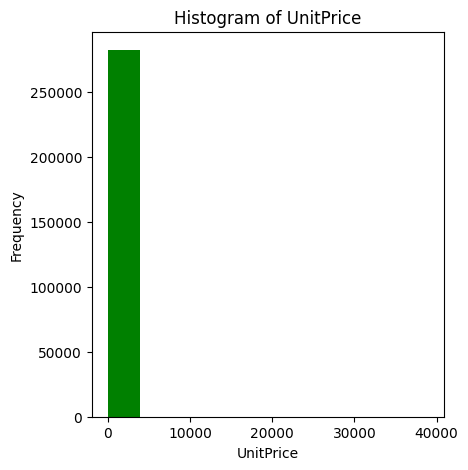

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(my_data_set_df['UnitPrice'], bins=10, color='green')
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

**Plot a histogram for Quantity**

Text(0, 0.5, 'Frequency')

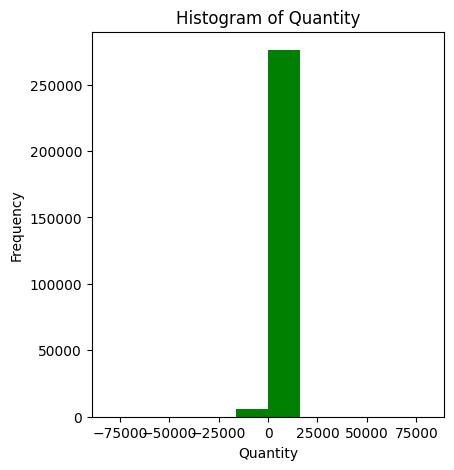

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(my_data_set_df['Quantity'], bins=10, color='green')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

**Plot a scatterplot for Quantity vs. UnitPrice**

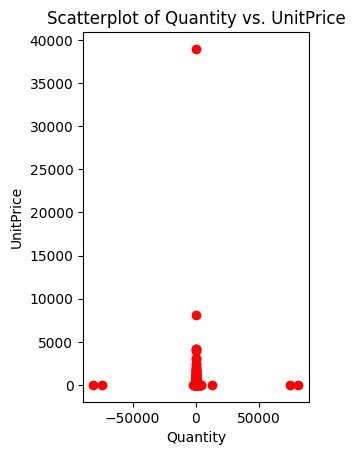

In [22]:
plt.subplot(1, 2, 2)
plt.scatter(my_data_set_df['Quantity'], my_data_set_df['UnitPrice'], color='red', alpha=1)
plt.title('Scatterplot of Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

**Plot a boxplot**

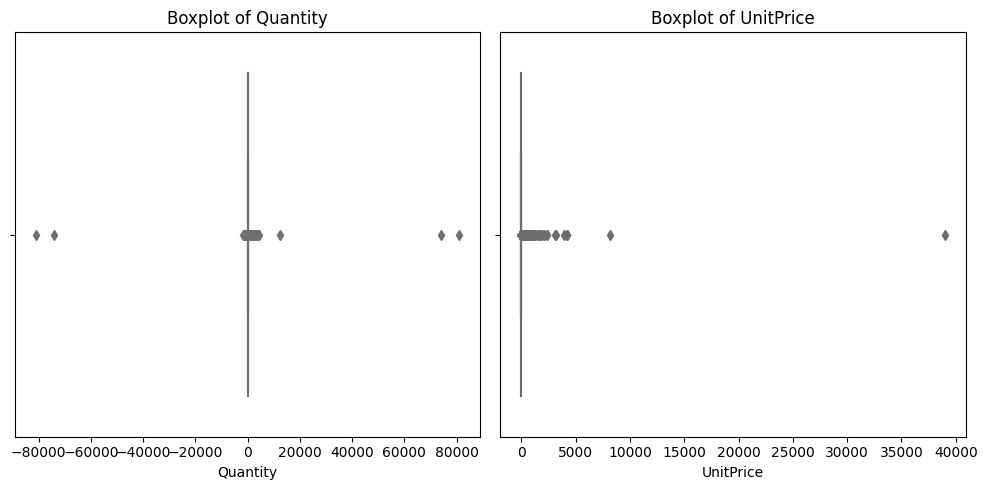

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Quantity', data=my_data_set_df, color='skyblue')
plt.title('Boxplot of Quantity')
plt.subplot(1, 2, 2)
sns.boxplot(x='UnitPrice', data=my_data_set_df, color='salmon')
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

**Analysis with Heatmap of Quantity and Unit Price**

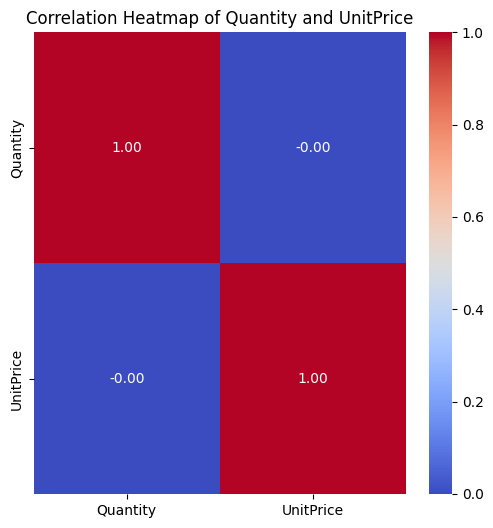

In [26]:
correlation_matrix = my_data_set_df[['Quantity', 'UnitPrice']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Quantity and UnitPrice")

# Display the plots
plt.show()